# Scipy

![scipy](https://docs.scipy.org/doc/scipy-0.7.x/reference/_static/scipyshiny_small.png)

Scipy is the scientific Python ecosystem : 
- fft, linear algebra, scientific computation,...
- scipy contains numpy, it can be considered as an extension of numpy.
- the add-on toolkits [Scikits](https://scikits.appspot.com/scikits) complements scipy.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
import numpy as np
import scipy as sp
np.sqrt(-1.), np.log(-2.) 

/opt/miniconda3/envs/math-python/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/miniconda3/envs/math-python/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


(nan, nan)

In [3]:
sp.sqrt(-1.), sp.log(-2.) 

(1j, (0.6931471805599453+3.141592653589793j))

In [4]:
sp.exp(sp.log(-2.))

(-2+2.4492935982947064e-16j)

##  SciPy main packages
- `constants` : Physical and mathematical constants
- `fftpack` : Fast Fourier Transform routines
- `integrate` : Integration and ordinary differential equation solvers
- `interpolate` : Interpolation and smoothing splines
- `io` : Input and Output
- `linalg` : Linear algebra
- `signal` : Signal processing
- `sparse` : Sparse matrices and associated routines 


In [5]:
from scipy.interpolate import interp1d 
x = np.linspace(-1, 1, num=5)  # 5 points evenly spaced in [-1,1].
y = (x-1.)*(x-0.5)*(x+0.5)     # x and y are numpy arrays
f0 = interp1d(x,y, kind='zero')
f1 = interp1d(x,y, kind='linear') 
f2 = interp1d(x,y, kind='quadratic') 
f3 = interp1d(x,y, kind='cubic') 
f4 = interp1d(x,y, kind='nearest') 

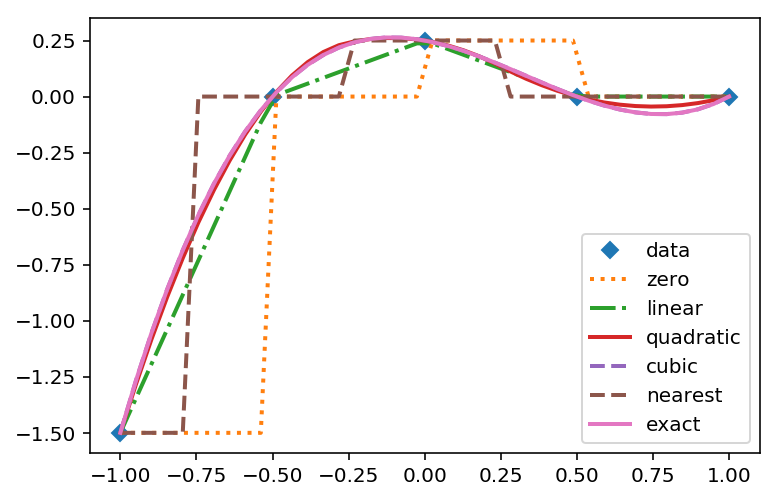

In [6]:
xnew = sp.linspace(-1, 1, num=40) 
ynew = (xnew-1.)*(xnew-0.5)*(xnew+0.5) 
plt.plot(x,y,'D',xnew,f0(xnew),':', xnew, f1(xnew),'-.',
                xnew,f2(xnew),'-',xnew ,f3(xnew),'--',
                xnew,f4(xnew),'--',xnew, ynew, linewidth=2)
plt.legend(['data','zero','linear','quadratic','cubic','nearest','exact'],
          loc='best');

In [7]:
from scipy.interpolate import interp2d
x,y=sp.mgrid[0:1:20j,0:1:20j]  #create the grid 20x20
z=sp.cos(4*sp.pi*x)*sp.sin(4*sp.pi*y) #initialize the field
T1=interp2d(x,y,z,kind='linear') 
T2=interp2d(x,y,z,kind='cubic') 
T3=interp2d(x,y,z,kind='quintic')

Text(0.5,1,'100x100 quintic')

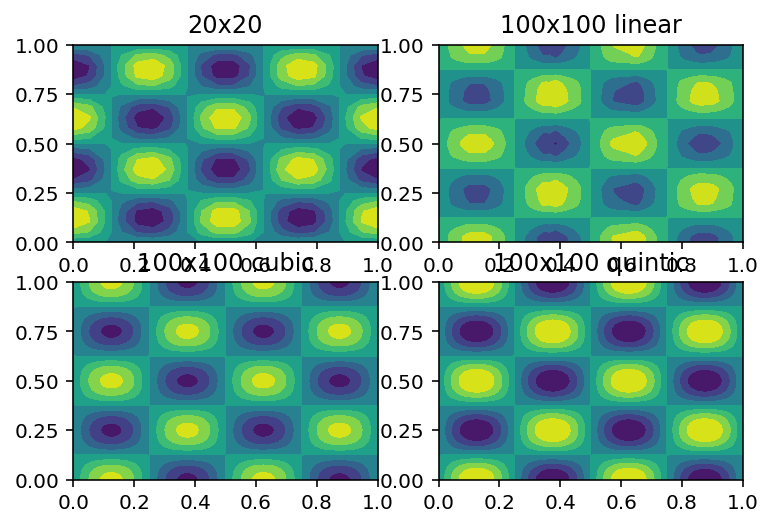

In [8]:
X,Y=sp.mgrid[0:1:100j,0:1:100j] #create the interpolation grid 100x100 
# complex -> number of points, float -> step size
plt.figure(1) 
plt.subplot(221) #Plot original data
plt.contourf(x,y,z) 
plt.title('20x20') 
plt.subplot(222) #Plot linear interpolation
plt.contourf(X,Y,T1(X[:,0],Y[0,:])) 
plt.title('100x100 linear') 
plt.subplot(223) #Plot cubic interpolation
plt.contourf(X,Y,T2(X[:,0],Y[0,:])) 
plt.title('100x100 cubic')
plt.subplot(224) #Plot quintic interpolation
plt.contourf(X,Y,T3(X[:,0],Y[0,:])) 
plt.title('100x100 quintic') 

## FFT : scipy.fftpack
- FFT dimension 1, 2 and n : fft, ifft (inverse), rfft (real), irfft, fft2 (dimension 2), ifft2, fftn (dimension n), ifftn.
- Discrete cosinus transform : dct
- Convolution product : convolve

In [9]:
from numpy.fft import fft, ifft
x = np.random.random(1024)
%timeit ifft(fft(x))

58.9 µs ± 616 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
from scipy.fftpack import fft, ifft
x = np.random.random(1024)
%timeit ifft(fft(x))

23.3 µs ± 869 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Linear algebra : scipy.linalg
- Sovers, decompositions, eigen values. (same as numpy).
- Matrix functions : expm, sinm, sinhm,...  
- Block matrices diagonal, triangular, periodic,...

In [11]:
import scipy.linalg as spl 
b=sp.ones(5)
A=sp.array([[1.,3.,0., 0.,0.],
           [ 2.,1.,-4, 0.,0.],
           [ 6.,1., 2,-3.,0.], 
           [ 0.,1., 4.,-2.,-3.], 
           [ 0.,0., 6.,-3., 2.]])
print("x=",spl.solve(A,b,sym_pos=False)) # LAPACK ( gesv ou posv )
AB=sp.array([[0.,3.,-4.,-3.,-3.],
             [1.,1., 2.,-2., 2.],
             [2.,1., 4.,-3., 0.],
             [6.,1., 6., 0., 0.]])
print("x=",spl.solve_banded((2,1),AB,b)) # LAPACK ( gbsv )


x= [-0.24074074  0.41358025 -0.26697531 -0.85493827  0.01851852]
x= [-0.24074074  0.41358025 -0.26697531 -0.85493827  0.01851852]


In [12]:
P,L,U = spl.lu(A) #  P A = L U
np.set_printoptions(precision=3)
for M in (P,L,U):
    print(M, end="\n"+20*"-"+"\n")

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]
--------------------
[[ 1.     0.     0.     0.     0.   ]
 [ 0.167  1.     0.     0.     0.   ]
 [ 0.     0.     1.     0.     0.   ]
 [ 0.333  0.235 -0.765  1.     0.   ]
 [ 0.     0.353  0.686  0.083  1.   ]]
--------------------
[[ 6.     1.     2.    -3.     0.   ]
 [ 0.     2.833 -0.333  0.5    0.   ]
 [ 0.     0.     6.    -3.     2.   ]
 [ 0.     0.     0.    -1.412  1.529]
 [ 0.     0.     0.     0.    -4.5  ]]
--------------------


##  CSC (Compressed Sparse Column) 

- All operations are optimized 
- Efficient "slicing" along axis=1.
- Fast Matrix-vector product.
- Conversion to other format could be costly.

In [13]:
import scipy.sparse as spsp
row = sp.array([0,2,2,0,1,2]) 
col = sp.array([0,0,1,2,2,2])
data  = sp.array([1,2,3,4,5,6]) 
Mcsc1 = spsp.csc_matrix((data,(row,col)),shape=(3,3)) 
Mcsc1.todense()

matrix([[1, 0, 4],
        [0, 0, 5],
        [2, 3, 6]], dtype=int64)

In [14]:
indptr  = sp.array([0,2,3,6]) 
indices = sp.array([0,2,2,0,1,2]) 
data    = sp.array([1,2,3,4,5,6]) 
Mcsc2 = spsp.csc_matrix ((data,indices,indptr),shape=(3,3))
Mcsc2.todense()

matrix([[1, 0, 4],
        [0, 0, 5],
        [2, 3, 6]])

## Dedicated format for assembling 
- `lil_matrix` : Row-based linked list matrix. Easy format to build your matrix and convert to other format before solving.
- `dok_matrix` : A dictionary of keys based matrix. Ideal format for
incremental matrix building. The conversion to csc/csr format is efficient.
- `coo_matrix`  : coordinate list format. Fast conversion to formats CSC/CSR.

[Lien vers la documentation scipy](http://docs.scipy.org/doc/scipy/reference/sparse.html)

## Sparse matrices : [scipy.sparse.linalg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg)

- speigen, speigen_symmetric, lobpcg : (ARPACK).
- svd : (ARPACK).
- Direct methods (UMFPACK or SUPERLU) ou iteratives 
- Minimization : lsqr and minres

For linear algebra:
- Noobs: spsolve.
- Intermmediate: dsolve.spsolve or isolve.spsolve
- Advanced: splu, spilu (direct); cg, cgs, bicg, bicgstab, gmres, lgmres et qmr (iterative)
- Boss: petsc4py et slepc4py.


## LinearOperator

The LinearOperator is used for matrix-free numerical methods.

In [15]:
import scipy.sparse.linalg as spspl
def mv(v):
   return sp.array([2*v[0],3*v[1]])

A=spspl.LinearOperator((2 ,2),matvec=mv,dtype=float )
A

<2x2 _CustomLinearOperator with dtype=float64>

In [16]:
A*sp.ones(2)

array([2., 3.])

In [17]:
A.matmat(sp.array([[1,-2],[3,6]]))

array([[ 2, -4],
       [ 9, 18]])

## LU decomposition

In [18]:
N = 50
un = sp.ones(N)
w = sp.rand(N+1)
A = spsp.spdiags([w[1:],-2*un,w[:-1]],[-1,0,1],N,N) # tridiagonal matrix
A = A.tocsc()
b = un
op = spspl.splu(A)
op

In [19]:
x=op.solve(b)
spl.norm(A*x-b)

1.4895204919483639e-15

## Conjugate Gradient

In [20]:
global k
k=0
def f(xk): # function called at every iterations
     global k
     print ("iteration {0:2d} residu = {1:7.3g}".format(k,spl.norm(A*xk-b)))
     k += 1

x,info=spspl.cg(A,b,x0=sp.zeros(N),tol=1.0e-12,maxiter=N,M=None,callback=f)

iteration  0 residu =    2.93
iteration  1 residu =    1.45
iteration  2 residu =   0.703
iteration  3 residu =   0.249
iteration  4 residu =   0.112
iteration  5 residu =  0.0514
iteration  6 residu =  0.0211
iteration  7 residu = 0.00947
iteration  8 residu = 0.00421
iteration  9 residu = 0.00154
iteration 10 residu = 0.000695
iteration 11 residu = 0.000257
iteration 12 residu = 7.87e-05
iteration 13 residu = 2.81e-05
iteration 14 residu = 7.56e-06
iteration 15 residu = 2.9e-06
iteration 16 residu = 8.14e-07
iteration 17 residu = 4.1e-07
iteration 18 residu = 1.88e-07
iteration 19 residu = 5.93e-08
iteration 20 residu = 2.2e-08
iteration 21 residu = 6.19e-09
iteration 22 residu = 3.12e-09
iteration 23 residu = 6.03e-10
iteration 24 residu = 1.74e-10
iteration 25 residu = 4.66e-11
iteration 26 residu = 1.13e-11
iteration 27 residu = 3.28e-12


## Preconditioned conjugate gradient

In [21]:
pc=spspl.spilu(A,drop_tol=0.1)  # pc is an ILU decomposition
xp=pc.solve(b)
spl.norm(A*xp-b)

0.35293918663822244

In [22]:
def mv(v):
    return pc.solve(v)
lo = spspl.LinearOperator((N,N),matvec=mv)
k = 0
x,info=spspl.cg(A,b,x0=sp.zeros(N),tol=1.e-12,maxiter=N,M=lo,callback=f)

iteration  0 residu =   0.328
iteration  1 residu =   0.016
iteration  2 residu = 0.00121
iteration  3 residu = 4.81e-05
iteration  4 residu = 4.3e-06
iteration  5 residu = 2.71e-07
iteration  6 residu = 3.24e-08
iteration  7 residu = 2.21e-09
iteration  8 residu = 3.46e-10
iteration  9 residu = 3.01e-11
iteration 10 residu = 5.03e-12


## Numerical integration 

- quad, dblquad, tplquad,... Fortran library QUADPACK.


In [23]:
import scipy.integrate as spi

x2=lambda x: x**2
4.**3/3  # int(x2) in [0,4]

21.333333333333332

In [24]:
spi.quad(x2,0.,4.)

(21.333333333333336, 2.368475785867001e-13)

## Scipy ODE solver

It uses the Fortran ODEPACK library. 

### Van der Pol Oscillator
$$
\begin{eqnarray}
y_1'(t)	& = & y_2(t), \nonumber \\
y_2'(t)	& = & 1000(1 - y_1^2(t))y_2(t) - y_1(t) \nonumber
\end{eqnarray}
$$
with $y_1(0) = 2 $ and $ y_2(0) = 0. $.

In [25]:
import numpy as np
import scipy.integrate as spi

def vdp1000(y,t):
     dy=np.zeros(2)
     dy[0]=y[1]
     dy[1]=1000.*(1.-y[0]**2)*y[1]-y[0]
     return dy 

In [26]:
t0, tf =0,  3000
N = 300000
t, dt = np.linspace(t0,tf,N, retstep=True)

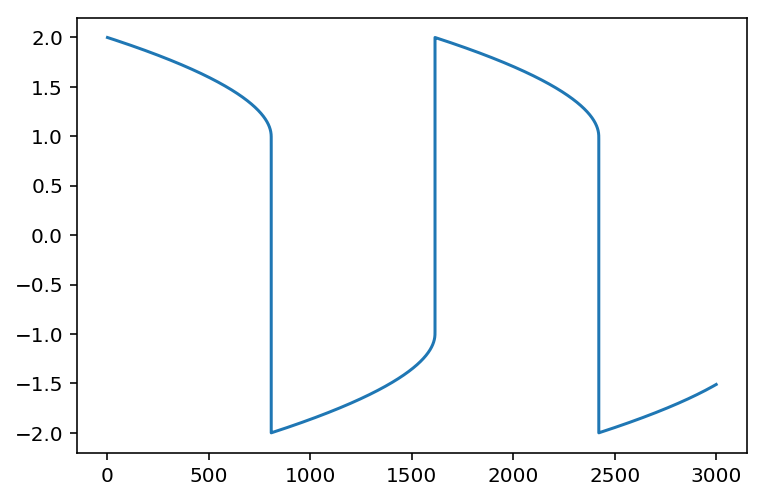

In [27]:
y=spi.odeint(vdp1000,[2.,0.],t)
plt.plot(t,y[:,0]);

## Exercise 

The following code solve the Laplace equation using a dense matrix.
- Modified the code to use a sparse matrix

CPU times: user 503 ms, sys: 75.9 ms, total: 579 ms
Wall time: 244 ms


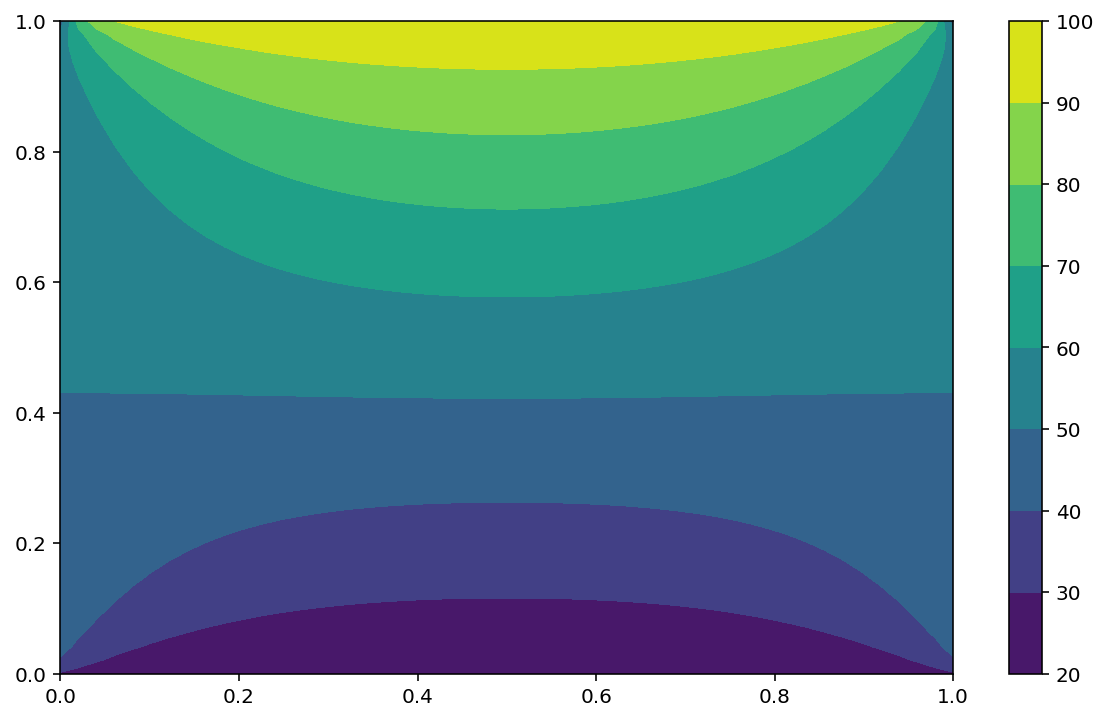

In [28]:
%%time
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

# Boundary conditions
Tnorth, Tsouth, Twest, Teast = 100, 20, 50, 50

# Set meshgrid
n = 50
l = 1.0
h = l / (n-1)
X, Y = np.meshgrid(np.linspace(0,l,n), np.linspace(0,l,n))
T = np.zeros((n,n),dtype='d')

# Set Boundary condition
T[n-1:, :] = Tnorth / h**2
T[:1, :] = Tsouth / h**2
T[:, n-1:] = Teast / h**2
T[:, :1] = Twest / h**2

A = np.zeros((n*n,n*n),dtype='d')
nn = n*n
ii = 0
for j in range(n):
    for i in range(n):   
      if j > 0:
         jj = ii - n
         A[ii,jj] = -1
      if j < n-1: 
         jj = ii + n
         A[ii,jj] = -1
      if i > 0:
         jj = ii - 1
         A[ii,jj] = -1
      if i < n-1:
         jj = ii + 1
         A[ii,jj] = -1
      A[ii,ii] = 4
      ii = ii+1
        

U = np.linalg.solve(A,np.ravel(h**2*T))
T = U.reshape(n,n)
plt.contourf(X,Y,T)
plt.colorbar()

CPU times: user 714 ms, sys: 131 ms, total: 845 ms
Wall time: 421 ms


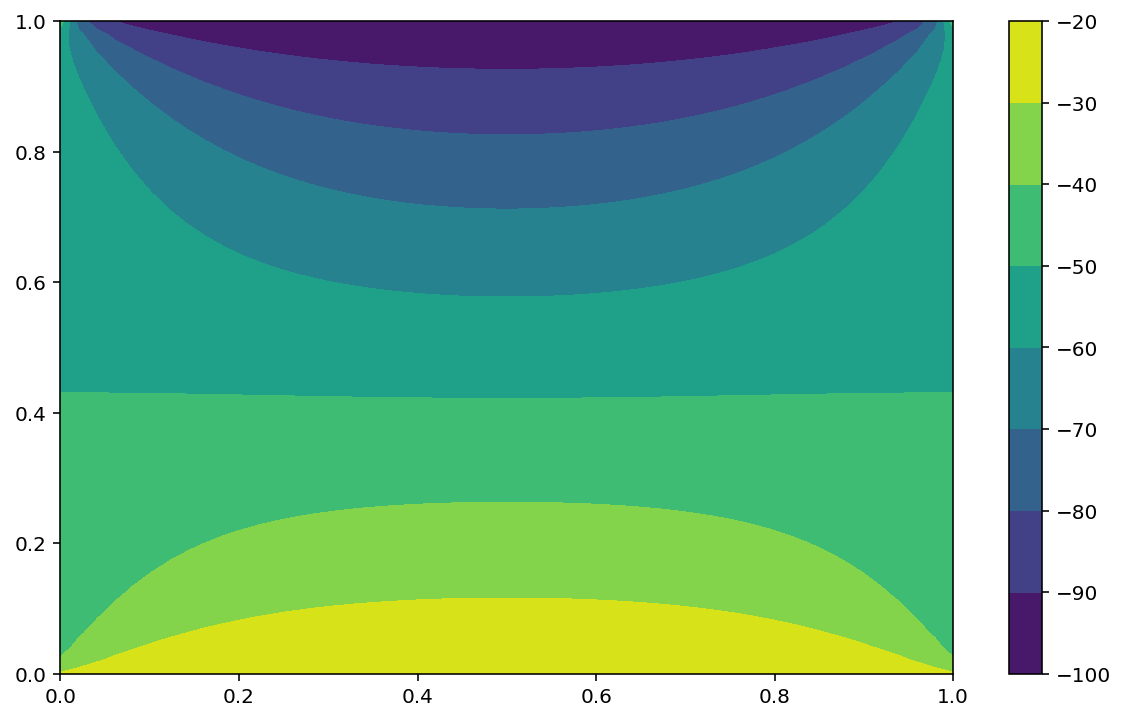

In [29]:
%%time
import scipy.sparse as spsp
import scipy.sparse.linalg as spspl

# Boundary conditions
Tnorth, Tsouth, Twest, Teast = 100, 20, 50, 50

# Set meshgrid
n = 50
l = 1.0
h = l / (n-1)
X, Y = np.meshgrid(np.linspace(0,l,n), np.linspace(0,l,n))
T = np.zeros((n,n),dtype='d')

# Set Boundary condition
T[n-1:, :]    = Tnorth / h**2
T[  :1, :]    = Tsouth / h**2
T[   :, n-1:] = Teast  / h**2
T[   :, :1]   = Twest  / h**2

bdiag = -4 * np.eye(n)
bup   = np.diag([1] * (n - 1), 1)
blow  = np.diag([1] * (n - 1), -1)
block = bdiag + bup + blow
# Creat a list of n blocks
blist = [block] * n
S = spsp.block_diag(blist)
# Upper diagonal array offset by -n
upper = np.diag(np.ones(n * (n - 1)), n)
# Lower diagonal array offset by -n
lower = np.diag(np.ones(n * (n - 1)), -n)
S += upper + lower

T = sp.linalg.solve(S,np.ravel(h**2*T))
plt.contourf(X,Y,T.reshape(n,n))
plt.colorbar();